In [ ]:
!apt-get update
!apt-get install gfortran -y

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,555 kB]
Get:14 http://archive.ubuntu.com/

In [ ]:
from google.colab import files
uploaded = files.upload()
import shutil
for filename in uploaded.keys():
    shutil.move(filename, filename)

In [ ]:
!gfortran -o etas etas.f

etas.f:162:72:

  162 |    10 xmg(i)=xmg(i)-xmag0
      |                                                                        1
etas.f:165:72:

  165 |    60 x(i)=xini(i)
      |                                                                        1
etas.f:170:72:

  170 |    70 x(i)=sqrt(x(i))
      |                                                                        1
etas.f:181:72:

  181 |    80 x(i)=x(i)**2
      |                                                                        1
etas.f:257:72:

  257 |    10 h(i,j) = 0.0d00
      |                                                                        1
etas.f:260:72:

  260 |    20 h(i,i) = 1.0d00
      |                                                                        1
etas.f:275:72:

  275 |    40 y(i) = g(i) - g0(i)
      |                                                                        1
etas.f:279:72:

  279 |    50 sum = sum + y(j) * h(i,j)
      |                                              

In [ ]:
!./etas

           9           2
   0.0000000000000000        145.19924000000000        1.0000000000000000E-002   145.19924000000000     
   2.2999999999999998        6.2999999999999998     
       minmag,  zts, zte, tstart
      2.300     0.000   145.199     0.010
      1   121.46000    23.85000         4.9     0.00000   17.4            2021  
 read #data; selected #data; #tstart; b-value; M_0
         867         867           0  0.64735377766207036        2.2999999999999998     
  funct =     9
 t,nn,mm       145.1992   867   867
 reference magnitudes; xmag0         6.3000
 n=  5
 x= 0.11397E+01 0.12250E+01 0.47987E-03 0.99722E+00 0.10902E+01
 is=           2
     initial (-1)*Log-Likelihood = -0.186228034506805D+04
 -ll=  0.10000D+31  0.59830D+01 0.12250D+01 0.47987D-03 0.99722D+00 0.22413D+02
 -ll=  0.94204D+05  0.14530D+01 0.12250D+01 0.47987D-03 0.99722D+00 0.19969D+01
 -ll= -0.18219D+04  0.11693D+01 0.12250D+01 0.47987D-03 0.99722D+00 0.11686D+01
 -ll= -0.18620D+04  0.11426D+01 0.12250

In [ ]:
!gfortran -o retas retas.f
!./retas

retas.f:148:72:

  148 |    40 xmg0(i)=xmg(i)-xmag0
      |                                                                        1
retas.f:169:49-67:

  169 |       write(6,1002) (i-ntstar,xmg(i),x(i),x(i)-x(i-1),xx(i),i=1,nn)
      |                                                 1                 2
  cutoff-mag/  ref-mag/    t_0  /     T   / dead-time.
      2.300     6.300     0.000   145.199     0.010
 input hypocenter data
    1     0.13572 3.2    2     1.76435 2.5    3     1.76544 2.3
    4     1.78562 3.8    5     1.80704 2.9    6     1.82344 2.6
    7     2.27920 3.6    8     2.49344 3.2    9     3.95254 2.8
   10     4.49204 4.1   11     4.52483 2.6   12     4.57873 2.5
   13     5.48967 2.4   14     5.87414 2.5   15     6.00124 2.9
   16     6.95432 3.0   17     7.16320 2.7   18     8.22217 2.4
   19     8.47836 2.4   20     8.81846 3.7   21     9.82791 2.4
   22    10.29171 2.5   23    10.38991 2.7   24    11.03615 5.8
   25    11.03637 4.6   26    11.03672 3.8   27    11

In [ ]:
import pandas as pd
import numpy as np
import re
import subprocess
import matplotlib.pyplot as plt
import csv
from google.colab import files

# Function to compile the Fortran program
def compile_fortran_program():
    subprocess.run(["gfortran", "-o", "etas", "etas.f"])

# Function to read the work.etas file
def read_work_etas(filepath):
    return pd.read_csv(filepath, delim_whitespace=True, header=None, names=[
        'seq_num', 'longitude', 'latitude', 'mag', 'days_from_t0', 'depth', 'year', 'month', 'day'
    ])

# Function to write subset data to work.etas file
def write_work_etas(subset_data, filename):
    subset_data.to_csv(filename, sep=' ', header=False, index=False)

# Function to extract mu value from the Fortran output based on the "-----  x  -----" line
def extract_mu(fortran_output):
    match = re.search(r'-----\s+x\s+-----\s*\n\s*([-0-9.eE+]+)', fortran_output)
    if match:
        mu_value = float(match.group(1))
        return mu_value
    else:
        raise ValueError("mu value not found")

# Function to run the Fortran program and get the mu value
def run_fortran_and_get_mu(input_file, control_file):
    # Run the Fortran program
    result = subprocess.run(["./etas"], capture_output=True, text=True)
    fortran_output = result.stdout
    print("Fortran Output:\n", fortran_output)

    # Extract mu from the Fortran output
    mu_value = extract_mu(fortran_output)
    return mu_value

In [ ]:
# Final line: 0 1 1 1 1 meaning fix the last four parameters and only allow temporal variations in mu
def write_etas_open(filename, zts, zte, tarst, mu, k, c, alpha, p):
    content = f"""9 2
{zts:.6f} {zte:.6f} {tarst:.6f} {zte:.6f}
2.300000 6.300000
{mu:.6E} {k:.6E} {c:.6E} {alpha:.6E} {p:.6E}
0 1 1 1 1
"""
    with open(filename, 'w') as f:
        f.write(content)


In [ ]:
compile_fortran_program()
data = read_work_etas('work.etas')

# Prepare to store mu values
mu_values = []
time_points = []

# Define the time window size (10 days) same process for window_size = 5 days; 1 day (run the code three times)
window_size = 10
min_data_points = 3  # Minimum data points required per window

# Define CSV file to save results
csv_filename = 'mu_values.csv'

# Create the CSV file and write headers
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Time (days)', 'Mu'])

# Loop through the data in 10-day windows with merging logic
start_time = 0
while start_time < data['days_from_t0'].max():
    end_time = start_time + window_size
    # Subset data within the current time window
    subset_data = data[(data['days_from_t0'] >= start_time) & (data['days_from_t0'] < end_time)]
    # Merge with the next window if the subset has fewer than min_data_points
    while len(subset_data) < min_data_points and end_time < data['days_from_t0'].max():
        end_time += window_size
        subset_data = data[(data['days_from_t0'] >= start_time) & (data['days_from_t0'] < end_time)]

    if not subset_data.empty:
        # Write subset data to work.etas
        write_work_etas(subset_data, 'work.etas')
        mu = 1.139694  # Starting value for mu

        # Update and write the control file with fixed parameters
        write_etas_open('etas.open', zts=start_time, zte=end_time, tarst=start_time + 0.01, mu=mu, k=1.225049, c=0.0004798738, alpha=0.9972223, p=1.090183)

        # Run Fortran code and get the mu value
        mu = run_fortran_and_get_mu('work.etas', 'etas.open')
        mu_values.append(mu)
        time_points.append(end_time)
        # Save the results to the CSV file
        with open(csv_filename, mode='a', newline='') as file:
            writer = csv.writer(file)
            writer.writerow([end_time, mu])

    # Move to the next time window
    start_time = end_time

Fortran Output:
      initial (-1)*Log-Likelihood =  0.537877203252657D+01
 lambda =  0.3168167D-01     -LL =  0.524491469706327D+01  -0.85D+01   0.85D+01
 lambda =  0.1012258D+01     -LL =  0.524491391565609D+01  -0.15D-05   0.49D-04
 -----  x  -----
   0.13450D+01  0.12250D+01  0.47987D-03  0.99722D+00  0.10902D+01
 ***  gradient  ***
   0.29356D-15  0.00000D+00  0.00000D+00  0.00000D+00  0.00000D+00

Fortran Output:
      initial (-1)*Log-Likelihood = -0.274123072609089D+03
 lambda =  0.5720545D-01     -LL = -0.279289804246790D+03  -0.16D+03   0.16D+03
 lambda =  0.8232362D+00     -LL = -0.279290480125886D+03  -0.16D-02   0.28D-01
 -----  x  -----
   0.32732D+01  0.12250D+01  0.47987D-03  0.99722D+00  0.10902D+01
 ***  gradient  ***
   0.10731D-10  0.00000D+00  0.00000D+00  0.00000D+00  0.00000D+00

Fortran Output:
      initial (-1)*Log-Likelihood = -0.148273381481745D+02
 lambda =  0.3178476D-01     -LL = -0.256501958507691D+02  -0.68D+03   0.68D+03
 lambda =  0.1008166D+01     -L

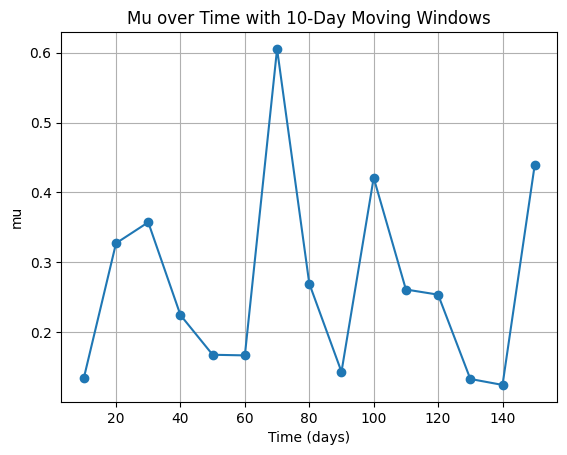

In [ ]:
import matplotlib.pyplot as plt

plt.plot(time_points, mu_values, marker='o')
plt.xlabel('Time (days)')
plt.ylabel('mu')
plt.title('Mu over Time with 10-Day Moving Windows')
plt.grid(True)
plt.show()

Fortran Output:
      initial (-1)*Log-Likelihood = -0.592973740238516D+00
 lambda =  0.5856632D-01     -LL = -0.122495093190881D+01  -0.22D+02   0.22D+02
 lambda =  0.1061316D+01     -LL = -0.122495827116378D+01  -0.14D-04   0.24D-03
 -----  x  -----
   0.18011D+01  0.25709D+00  0.57536D-03  0.92822D+00  0.10902D+01
 ***  gradient  ***
   0.69574D-14  0.00000D+00  0.00000D+00  0.00000D+00  0.00000D+00

Fortran Output:
      initial (-1)*Log-Likelihood =  0.526355827539235D+01
 lambda =  0.5043672D-01     -LL =  0.514285874366000D+01  -0.49D+01   0.49D+01
 lambda =  0.1045457D+01     -LL =  0.514285853284944D+01  -0.40D-06   0.80D-05
 -----  x  -----
   0.13893D+01  0.25709D+00  0.57536D-03  0.92822D+00  0.10902D+01
 ***  gradient  ***
   0.28018D-15  0.00000D+00  0.00000D+00  0.00000D+00  0.00000D+00

Fortran Output:
      initial (-1)*Log-Likelihood = -0.193945002993391D+03
 lambda =  0.7548060D-01     -LL = -0.214376098523560D+03  -0.54D+03   0.54D+03
 lambda =  0.9748340D+00     -L

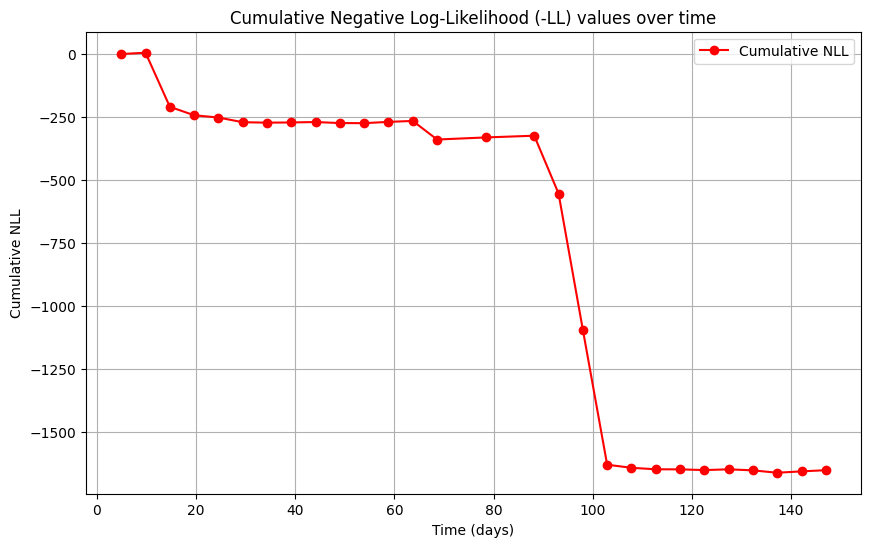

In [ ]:
# Function to extract the last -LL value from the Fortran output
def extract_last_negll(fortran_output):
    negll_matches = re.findall(r'-LL\s*=\s*([-+0-9.DdEe]+)', fortran_output)
    if negll_matches:
        return float(negll_matches[-1].replace('D', 'E'))  # Take the last -LL value
    else:
        raise ValueError("No -LL value found in Fortran output")

# Function to run the Fortran program and get the last -LL value
def run_fortran_and_get_nll(input_file, control_file):
    result = subprocess.run(["./etas"], capture_output=True, text=True)
    fortran_output = result.stdout
    print("Fortran Output:\n", fortran_output)
    last_negll = extract_last_negll(fortran_output)
    return last_negll

compile_fortran_program()
data = read_work_etas('work.etas')
nll_values = []
cumulative_nll = 0.0  # Initialize cumulative NLL
time_points = []

# Define the time window size (5 days) same for 10 days; 1 day
window_size = 5
min_data_points = 3  # Minimum data points required per window
csv_filename = 'nll_values.csv'
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Time (days)', 'Cumulative NLL'])

# Loop through the data in time windows with merging logic
start_time = 0
mu = 1.139694  # Initial mu value
p = 1.090183  # Fixed p value
while start_time < data['days_from_t0'].max():
    end_time = start_time + window_size
    # Subset data within the current time window
    subset_data = data[(data['days_from_t0'] >= start_time) & (data['days_from_t0'] < end_time)]

    # Merge with the next window if the subset has fewer than min_data_points
    while len(subset_data) < min_data_points and end_time < data['days_from_t0'].max():
        end_time += window_size
        subset_data = data[(data['days_from_t0'] >= start_time) & (data['days_from_t0'] < end_time)]

    if not subset_data.empty:
        write_work_etas(subset_data, 'work.etas')
        # Update and write the control file with fixed mu and p values
        write_etas_open('etas.open', zts=start_time, zte=end_time, tarst=start_time + 0.01, mu=mu, k=1.225049, c=0.0004798738, alpha=0.9972223, p=p)
        # Run Fortran code and get the last NLL value
        last_negll = run_fortran_and_get_nll('work.etas', 'etas.open')
        cumulative_nll += last_negll  # Update cumulative NLL
        nll_values.append(cumulative_nll)  # Store cumulative NLL
        time_points.append(end_time)

        with open(csv_filename, mode='a', newline='') as file:
            writer = csv.writer(file)
            writer.writerow([end_time, cumulative_nll])

    start_time = end_time

# Plot the cumulative NLL over time
plt.figure(figsize=(10, 6))
plt.plot(time_points, nll_values, marker='o', linestyle='-', color='r', label='Cumulative NLL')
plt.xlabel('Time (days)')
plt.ylabel('Cumulative NLL')
plt.title('Cumulative Negative Log-Likelihood (-LL) values over time')
plt.legend()
plt.grid(True)
plt.show()


Fortran Output:
      initial (-1)*Log-Likelihood = -0.475373867821613D+01
 lambda =  0.3125757D-02     -LL = -0.480508602466560D+01  -0.31D+02   0.31D+02
 lambda =  0.1530168D+00     -LL = -0.481282858307355D+01  -0.10D+00   0.12D+00
 lambda =  0.8799122D+00     -LL = -0.481287893412572D+01  -0.11D-03   0.36D-01
 lambda =  0.1019145D+01     -LL = -0.481287893454952D+01  -0.83D-09   0.72D-08
 -----  x  -----
   0.12495D+01  0.12250D+01  0.47987D-03  0.99722D+00  0.11254D+01
 ***  gradient  ***
   0.13172D-14  0.00000D+00  0.00000D+00  0.00000D+00  0.16298D-11

Fortran Output:
      initial (-1)*Log-Likelihood =  0.308870755760527D+01
 lambda =  0.5000000D-01     -LL =  0.210945949929621D+01  -0.12D+03   0.12D+03
 lambda =  0.1335417D+00     -LL =  0.204941575706683D+01  -0.37D+00   0.39D+00
 lambda =  0.3679959D+02     -LL =  0.202622605990135D+01  -0.11D-02   0.22D-01
 lambda =  0.3679959D+01     -LL =  0.205324853745918D+01  -0.50D-02   0.34D-02
 lambda =  0.3119700D-01     -LL =  0.

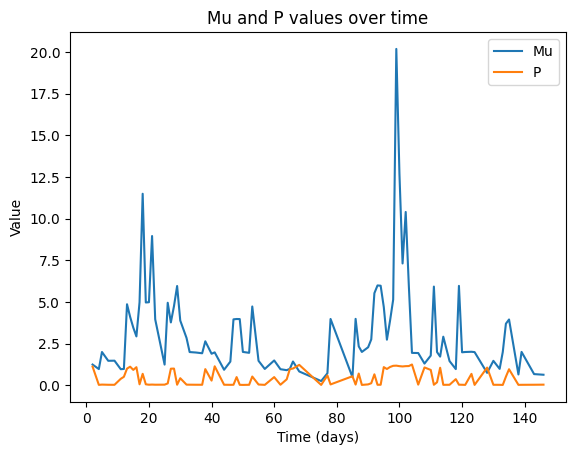

In [ ]:
#mu_p
def extract_mu_and_p(fortran_output):
    # Adjusted regex to capture five floating-point numbers from the relevant line
    match = re.search(r'-----\s+x\s+-----\s*\n\s*([-+0-9.DdEe]+)\s+([-+0-9.DdEe]+)\s+([-+0-9.DdEe]+)\s+([-+0-9.DdEe]+)\s+([-+0-9.DdEe]+)', fortran_output)
    if match:
        mu_value = float(match.group(1).replace('D', 'E'))  # Convert Fortran's D to Python's E
        p_value = float(match.group(5).replace('D', 'E'))   # Convert Fortran's D to Python's E
        return mu_value, p_value
    else:
        raise ValueError("mu or p value not found in Fortran output")

# Function to run the Fortran program and get the mu and p values
def run_fortran_and_get_mu_and_p(input_file, control_file):
    # Run the Fortran program
    result = subprocess.run(["./etas"], capture_output=True, text=True)
    fortran_output = result.stdout
    print("Fortran Output:\n", fortran_output)

    # Extract mu and p from the Fortran output
    mu_value, p_value = extract_mu_and_p(fortran_output)
    return mu_value, p_value

# Fix parameters K0, c, alpha and allow temporal variations in mu and p
def write_etas_open(filename, zts, zte, tarst, mu, k, c, alpha, p):
    content = f"""9 2
{zts:.6f} {zte:.6f} {tarst:.6f} {zte:.6f}
2.300000 6.300000
{mu:.6E} {k:.6E} {c:.6E} {alpha:.6E} {p:.6E}
0 1 1 1 0
"""
    with open(filename, 'w') as f:
        f.write(content)

compile_fortran_program()
data = read_work_etas('work.etas')

mu_values = []
p_values = []
time_points = []

# time window size (5 days), same for 10 days, 1 day
window_size = 5
min_data_points = 3  # Minimum data points required per window

csv_filename = 'mu_p_values.csv'
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Time (days)', 'Mu', 'P'])

# Loop through the data in time windows with merging logic
start_time = 0
mu = 1.139694  # Initial mu value
p = 1.090183  # Initial p value
while start_time < data['days_from_t0'].max():
    end_time = start_time + window_size

    # Subset data within the current time window
    subset_data = data[(data['days_from_t0'] >= start_time) & (data['days_from_t0'] < end_time)]

    # Merge with the next window if the subset has fewer than min_data_points
    while len(subset_data) < min_data_points and end_time < data['days_from_t0'].max():
        end_time += window_size
        subset_data = data[(data['days_from_t0'] >= start_time) & (data['days_from_t0'] < end_time)]

    if not subset_data.empty:
        write_work_etas(subset_data, 'work.etas')
        # Update and write the control file with current mu and p values
        write_etas_open('etas.open', zts=0, zte=end_time, tarst=start_time + 0.01, mu=mu, k=1.225049, c=0.0004798738, alpha=0.9972223, p=p)
        # Run Fortran code and get the updated mu and p values
        mu, p = run_fortran_and_get_mu_and_p('work.etas', 'etas.open')
        mu_values.append(mu)
        p_values.append(p)
        time_points.append(end_time)

        # Save the results to the CSV file
        with open(csv_filename, mode='a', newline='') as file:
            writer = csv.writer(file)
            writer.writerow([end_time, mu, p])

    start_time = end_time

plt.plot(time_points, mu_values, label='Mu')
plt.plot(time_points, p_values, label='P')
plt.xlabel('Time (days)')
plt.ylabel('Value')
plt.legend()
plt.title('Mu and P values over time')
plt.show()

<ipython-input-271-36fbad07217b>:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(filepath, delim_whitespace=True, header=None, names=[


Fortran Output:
      initial (-1)*Log-Likelihood =  0.454704233705110D+01
 lambda =  0.5000000D-01     -LL =  0.397808156708176D+01  -0.41D+02   0.41D+02
 lambda =  0.6668269D-01     -LL =  0.393710958867248D+01  -0.39D-01   0.15D+00
 lambda =  0.2097865D+02     -LL =  0.387355115490347D+01  -0.76D-02   0.15D+00
 lambda =  0.1481556D+01     -LL =  0.386823192434910D+01  -0.60D-02   0.44D-01
 lambda =  0.3011261D+00     -LL =  0.386790016873526D+01  -0.15D-02   0.84D-02
 lambda =  0.1009138D+01     -LL =  0.386773191837051D+01  -0.33D-03   0.62D-02
 lambda =  0.7677629D+00     -LL =  0.386772228581632D+01  -0.26D-04   0.14D-03
 lambda =  0.9988111D+00     -LL =  0.386772226924049D+01  -0.33D-07   0.41D-06
 lambda =  0.1032677D+01     -LL =  0.386772226922852D+01  -0.23D-10   0.19D-09
 -----  x  -----
   0.38906D+00  0.25709D+00  0.57536D-03  0.92822D+00  0.32599D-01
 ***  gradient  ***
   0.10144D-14  0.00000D+00  0.00000D+00  0.00000D+00  0.14072D-16

Fortran Output:
      initial (-1

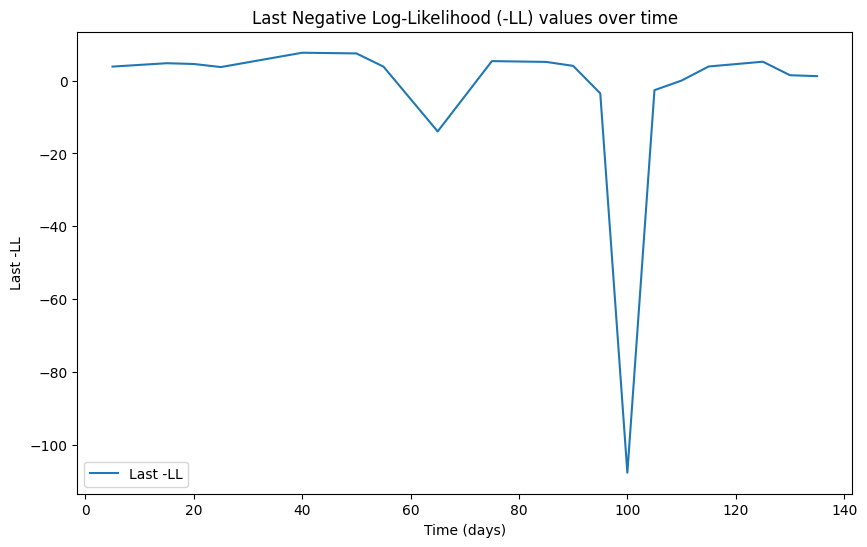

In [ ]:
last_negll_values = []
time_points = []

# Define the time window size
window_size = 5
min_data_points = 3

# Define CSV file to save results
csv_filename = 'last_negll_values.csv'

# Create the CSV file and write headers
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Time (days)', 'Last -LL'])

start_time = 0
total_last_negll = 0.0

while start_time < data['days_from_t0'].max():
    end_time = start_time + window_size
    subset_data = data[(data['days_from_t0'] >= start_time) & (data['days_from_t0'] < end_time)]
    while len(subset_data) < min_data_points and end_time < data['days_from_t0'].max():
        end_time += window_size
        subset_data = data[(data['days_from_t0'] >= start_time) & (data['days_from_t0'] < end_time)]

    if not subset_data.empty:
        write_work_etas(subset_data, 'work.etas')

        # Update and write the control file with current mu and p values
        write_etas_open('etas.open', zts=start_time, zte=end_time, tarst=start_time + 0.01, mu=mu, k=1.225049, c=0.0004798738, alpha=0.9972223, p=p)

        # Run Fortran code and get the last -LL value
        try:
            last_negll = run_fortran_and_get_last_negll('work.etas', 'etas.open')
            last_negll_values.append(last_negll)
            time_points.append(end_time)

            # Accumulate total last -LL value
            total_last_negll += last_negll

            # Save the results to the CSV file
            with open(csv_filename, mode='a', newline='') as file:
                writer = csv.writer(file)
                writer.writerow([end_time, last_negll])

        except ValueError as e:
            print(f"Error extracting last -LL for window starting at {start_time} days: {e}")
            continue
    start_time = end_time

print(f"Total summed last -LL: {total_last_negll}")
plt.figure(figsize=(10, 6))
plt.plot(time_points, last_negll_values, label='Last -LL')
plt.xlabel('Time (days)')
plt.ylabel('Last -LL')
plt.legend()
plt.title('Last Negative Log-Likelihood (-LL) values over time')
plt.show()


etas.f:162:72:

  162 |    10 xmg(i)=xmg(i)-xmag0
      |                                                                        1
etas.f:165:72:

  165 |    60 x(i)=xini(i)
      |                                                                        1
etas.f:170:72:

  170 |    70 x(i)=sqrt(x(i))
      |                                                                        1
etas.f:181:72:

  181 |    80 x(i)=x(i)**2
      |                                                                        1
etas.f:257:72:

  257 |    10 h(i,j) = 0.0d00
      |                                                                        1
etas.f:260:72:

  260 |    20 h(i,i) = 1.0d00
      |                                                                        1
etas.f:275:72:

  275 |    40 y(i) = g(i) - g0(i)
      |                                                                        1
etas.f:279:72:

  279 |    50 sum = sum + y(j) * h(i,j)
      |                                              

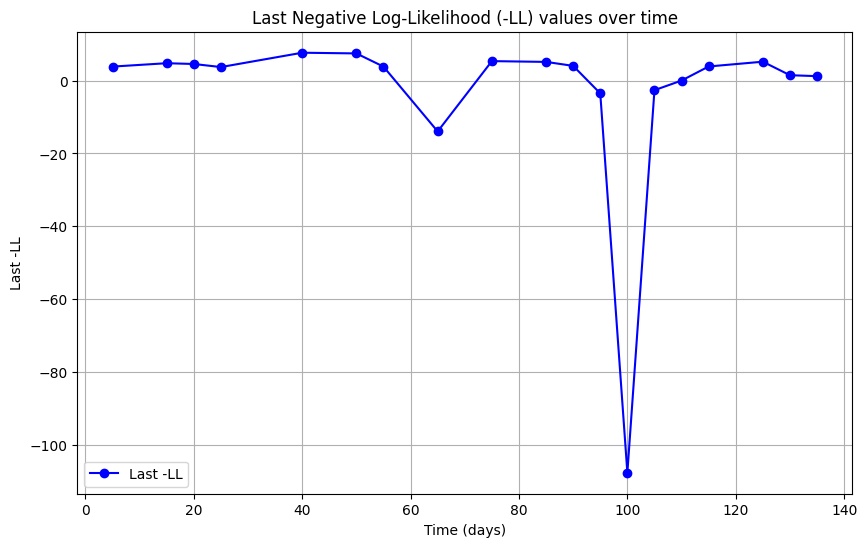

In [ ]:
last_negll_values = []
time_points = []

window_size = 5
min_data_points = 3
csv_filename = 'last_negll_values.csv'

# Create the CSV file and write headers
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Time (days)', 'Last -LL'])

start_time = 0
total_last_negll = 0.0  # Initialize total summed last -LL accumulator

while start_time < data['days_from_t0'].max():
    end_time = start_time + window_size

    subset_data = data[(data['days_from_t0'] >= start_time) & (data['days_from_t0'] < end_time)]
    while len(subset_data) < min_data_points and end_time < data['days_from_t0'].max():
        end_time += window_size
        subset_data = data[(data['days_from_t0'] >= start_time) & (data['days_from_t0'] < end_time)]

    if not subset_data.empty:
        write_work_etas(subset_data, 'work.etas')
        write_etas_open('etas.open', zts=start_time, zte=end_time, tarst=start_time + 0.01, mu=mu, k=1.23, c=0.000575363, alpha=0.997, p=p)

        # Run the Fortran program using a shell command
        !./etas > etas_output.txt
        # Read the Fortran output from the file
        with open('etas_output.txt', 'r') as file:
            fortran_output = file.read()
        # Extract the last negative log-likelihood value
        last_negll = extract_last_negll(fortran_output)
        last_negll_values.append(last_negll)
        time_points.append(end_time)
        # Accumulate total last -LL value
        total_last_negll += last_negll
        with open(csv_filename, mode='a', newline='') as file:
            writer = csv.writer(file)
            writer.writerow([end_time, last_negll])

    start_time = end_time


print(f"Total summed last -LL: {total_last_negll}")
plt.figure(figsize=(10, 6))
plt.plot(time_points, last_negll_values, marker='o', linestyle='-', color='b', label='Last -LL')
plt.xlabel('Time (days)')
plt.ylabel('Last -LL')
plt.title('Last Negative Log-Likelihood (-LL) values over time')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-288-522f0fb78c0c>:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(filepath, delim_whitespace=True, header=None, names=[
<ipython-input-288-522f0fb78c0c>:137: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  residuals_df = pd.read_csv('work.res', delim_whitespace=True, header=None, names=[
<ipython-input-288-522f0fb78c0c>:137: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  residuals_df = pd.read_csv('work.res', delim_whitespace=True, header=None, names=[
<ipython-input-288-522f0fb78c0c>:137: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  residuals_df = pd.read_csv('work.r

Contents of the combined work.res:
    seq_num  longitude  latitude  mag  days_from_t0  depth  residual
0         1     121.70     24.28  3.7       1.78561   29.7   0.69082
1         2     121.68     24.01  4.0       4.49204   30.2   1.81216
0         1     121.48     23.87  5.8       6.03615   16.3   1.20680
1         2     121.48     23.86  6.2       6.03821   14.4   1.22048
2         3     121.48     23.81  3.8       8.26014    8.5   2.99743
..      ...        ...       ...  ...           ...    ...       ...
1         2     121.62     23.86  3.8       2.72031    4.3   1.02215
0         1     121.63     23.94  4.6       3.77175    6.4   1.20760
1         2     121.61     23.94  3.6       3.78110    6.8   1.55652
2         3     121.65     23.95  4.3       4.07863    7.4   2.18674
3         4     121.62     23.96  4.3       4.09372    4.7   2.49213

[102 rows x 7 columns]

KS Statistic: 0.12837484264786847
p-value: 0.0633057111650003


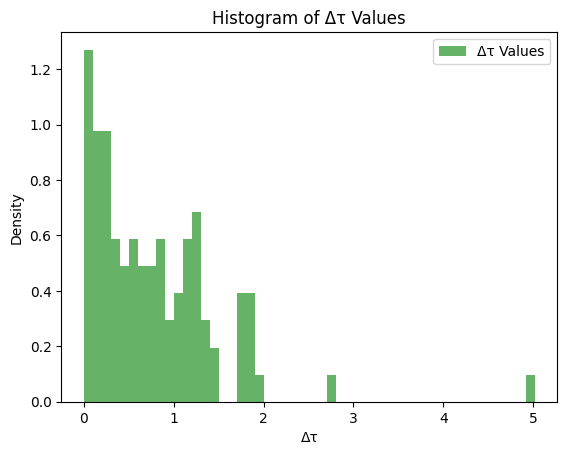

In [ ]:
from scipy.stats import kstest

# Function to compile the Fortran programs: etas.f and retas.f
def compile_fortran_programs():
    subprocess.run(["gfortran", "-o", "etas", "etas.f"])
    subprocess.run(["gfortran", "-o", "retas", "retas.f"])


def perform_ks_test(residuals):
    """
    Perform the Kolmogorov-Smirnov (KS) test to determine if the residuals
    follow an exponential distribution with mean 1.

    Parameters:
        residuals (array-like): The residuals to be tested.

    Returns:
        ks_stat (float): The KS statistic.
        p_value (float): The p-value for the test.
    """
    # Perform the KS test against the exponential distribution with mean 1
    ks_stat, p_value = kstest(residuals, 'expon', args=(0, 1))
    return ks_stat, p_value

# calculate residuals using retas.f
def calculate_residuals():
    subprocess.run(["./retas"])

# Prepare to store mu, p values, all residuals from work.res, and delta_tau values
mu_values = []
p_values = []
all_residuals = pd.DataFrame()
delta_tau_values = []

window_size = 5
min_data_points = 3
csv_filename = 'mu_p_values.csv'

with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Time (days)', 'Mu', 'P'])

# Loop through the data in time windows
start_time = 0

while start_time < data['days_from_t0'].max():
    end_time = start_time + window_size
    subset_data = data[(data['days_from_t0'] >= start_time) & (data['days_from_t0'] < end_time)]

    # Merge with the next window if the subset has fewer than min_data_points
    while len(subset_data) < min_data_points and end_time < data['days_from_t0'].max():
        end_time += window_size
        subset_data = data[(data['days_from_t0'] >= start_time) & (data['days_from_t0'] < end_time)]

    if not subset_data.empty:
        # Write subset data to work.etas
        write_work_etas(subset_data, 'work.etas')
        write_etas_open('etas.open', zts=start_time, zte=end_time, tarst=start_time + 0.01, mu=mu, k=1.23, c=0.000575363, alpha=0.997, p=p)

        # Run Fortran code and get the updated mu and p values
        mu, p = run_fortran_and_get_mu_and_p()

        # Update and write the control file with new mu and p values
        write_etas_open('etas.open', zts=start_time, zte=end_time, tarst=start_time + 0.01, mu=mu, k=1.23, c=0.000575363, alpha=0.997, p=p)

        # Run Fortran code again with the updated parameters to refine the model
        subprocess.run(["./etas"])
        calculate_residuals()
        residuals_df = pd.read_csv('work.res', delim_whitespace=True, header=None, names=[
            'seq_num', 'longitude', 'latitude', 'mag', 'days_from_t0', 'depth', 'residual'
        ])

        # Append the residuals to the all_residuals DataFrame
        all_residuals = pd.concat([all_residuals, residuals_df])
        delta_tau_values.append(residuals_df['residual'].iloc[0])

        # Calculate the delta_tau (differences) between successive residuals
        delta_tau = np.diff(residuals_df['residual'])
        delta_tau_values.extend(delta_tau)
        mu_values.append(mu)
        p_values.append(p)
        with open(csv_filename, mode='a', newline='') as file:
            writer = csv.writer(file)
            writer.writerow([end_time, mu, p])
    start_time = end_time

print("Contents of the combined work.res:")
print(all_residuals)
# Perform KS test on the accumulated delta_tau values
ks_stat, p_value = perform_ks_test(delta_tau_values)
print(f"\nKS Statistic: {ks_stat}")
print(f"p-value: {p_value}")

plt.hist(delta_tau_values, bins=50, density=True, alpha=0.6, color='g', label='$\Delta\\tau$ Values')
plt.xlabel('$\Delta\\tau$')
plt.ylabel('Density')
plt.title('Histogram of $\Delta\\tau$ Values')
plt.legend()
plt.show()